In [1]:

import csv, math
from matplotlib import pyplot as plt 
import numpy as np 

In [2]:
# csv file headers
numCount_header = "Number Count"
numIterations_header = "Num of Iterations"
avgTime_header= "Average Time"
stdTime_header= "Std"

csvHeaders = [numCount_header, numIterations_header, avgTime_header, stdTime_header]

In [3]:
# raspi data

data_raspi = {header:[] for header in csvHeaders}
with open('raspberry-pi/py3-fibotest-rpi4.csv') as csvFile:
    csvReader = csv.DictReader(csvFile)
    for row in csvReader:
        for header in csvHeaders:
            data_raspi[header].append(float(row[header]))

for header in csvHeaders:
    data_raspi[header] = np.array(data_raspi[header])

print(data_raspi)

{'Number Count': array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000., 110000., 120000., 130000., 140000.,
       150000., 160000., 170000., 180000., 190000., 200000., 210000.,
       220000., 230000., 240000., 250000., 260000., 270000., 280000.,
       290000., 300000., 310000., 320000., 330000., 340000., 350000.,
       360000., 370000., 380000., 390000., 400000., 410000., 420000.,
       430000., 440000., 450000., 460000., 470000., 480000., 490000.]), 'Num of Iterations': array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]), 'Average Time': array([7.502e-03, 2.219e-02, 4.469e-02, 7.182e-02, 1.064e-01, 1.473e-01,
       1.962e-01, 2.529e-01, 3.155e-01, 3.838e-01, 4.614e-01, 5.479e-01,
       6.417e-01, 7.422e-01, 8.48

In [4]:
# udoo bolt data

data_udoobolt = {header:[] for header in csvHeaders}
with open('udoo-bolt/py3-fibotest-boltv3.csv') as csvFile:
    csvReader = csv.DictReader(csvFile)
    for row in csvReader:
        for header in row:
            data_udoobolt[header].append(float(row[header]))
for header in csvHeaders:
    data_udoobolt[header] = np.array(data_udoobolt[header])

print(data_udoobolt)

{'Number Count': array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000., 110000., 120000., 130000., 140000.,
       150000., 160000., 170000., 180000., 190000., 200000., 210000.,
       220000., 230000., 240000., 250000., 260000., 270000., 280000.,
       290000., 300000., 310000., 320000., 330000., 340000., 350000.,
       360000., 370000., 380000., 390000., 400000., 410000., 420000.,
       430000., 440000., 450000., 460000., 470000., 480000., 490000.]), 'Num of Iterations': array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]), 'Average Time': array([0.003022, 0.007311, 0.01496 , 0.02196 , 0.03222 , 0.04526 ,
       0.05814 , 0.07452 , 0.09111 , 0.1116  , 0.1321  , 0.1579  ,
       0.1823  , 0.2104  , 0.2393  , 0.2711  

<ipython-input-12-9260eed4a621>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


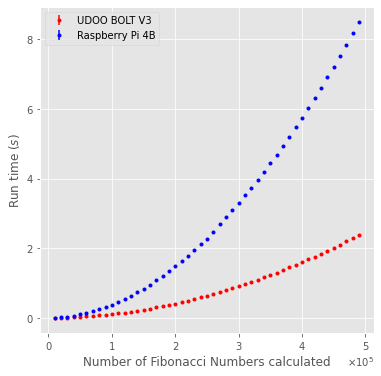

In [12]:
# plotter
plt.style.use("ggplot")
fig = plt.figure(figsize=[6,6])

axis = fig.add_subplot()
#axis.title("Fibonacci Benchmark")

axis.errorbar(x=data_udoobolt[numCount_header], y=data_udoobolt[avgTime_header], yerr=data_udoobolt[stdTime_header], fmt='ro', markersize=3, label='UDOO BOLT V3')
axis.errorbar(x=data_raspi[numCount_header], y=data_raspi[avgTime_header], yerr=data_raspi[stdTime_header], fmt='bo', markersize=3, label='Raspberry Pi 4B')

#plt.xscale("log")
#plt.yscale("log")
axis.set_xlabel('Number of Fibonacci Numbers calculated')
axis.set_ylabel('Run time ($s$)')
legend= axis.legend()
plt.setp(legend.get_texts(), color='k')

axis.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)

fig.show()
fig.savefig('fibonacci-test.pdf', facecolor=(0,0,0,0))

In [ ]:
print("Difference between results: Udoo_performance is better than Raspi_performance by a factor of {}, avg={:.3f} +- {:.3f} ".format(
    "(" + ", ".join("{:.4f}".format(s) for s in 1/np.divide(data_udoobolt[avgTime_header], data_raspi[avgTime_header]))+ ")"
    , float(np.average(1/np.divide(data_udoobolt[avgTime_header], data_raspi[avgTime_header]))), 
    float(np.std(1/np.divide(data_udoobolt[avgTime_header], data_raspi[avgTime_header])))))

Difference between results: Udoo_performance is better than Raspi_performance by a factor of (2.4825, 3.0352, 2.9873, 3.2705, 3.3023, 3.2545, 3.3746, 3.3937, 3.4628, 3.4391, 3.4928, 3.4699, 3.5200, 3.5276, 3.5445, 3.5470, 3.5431, 3.5676, 3.5616, 3.5785, 3.5641, 3.5806, 3.5700, 3.5795, 3.5627, 3.5450, 3.6201, 3.6106, 3.6049, 3.6077, 3.6115, 3.6006, 3.6082, 3.6055, 3.6013, 3.5974, 3.5923, 3.5858, 3.5835, 3.5884, 3.5814, 3.5803, 3.5810, 3.5742, 3.5741, 3.5683, 3.5625, 3.5719, 3.5667), avg=3.497 +- 0.199 


In [ ]:
# export to latex
# ...